# Load packages and define useful functions

In [1]:
# Loading the required packages to run this notebook
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import seaborn as sns
from pathlib import Path

# Use seaborn style defaults and set the default figure size
fig_size = (12, 8)
sns.set(rc={"figure.figsize": fig_size})
sns.set_theme(style="whitegrid")
sns.set_context("paper", rc={"lines.linewidth": 3.0})
style.use("seaborn-colorblind")
sns.set_style("ticks")

# Setup the correct foldure structure
project_dir = Path().resolve().parents[1]
model_dir = project_dir / "models" / "saved-models"
model_intermediate_dir = model_dir / "intermediate"

In [2]:
# Define a function to read in the training/validation curves for a specified setup
def curves_df(setup_type, data_processed, model="VRNN", latent_dim="100", 
              recurrent_dim="100", batch_norm=False, scheduler=False, kl_annealing=False):
    # Figure out the .csv file name for the current model setup
    BatchNorm = "_batchNormTrue" if batch_norm else "_batchNormFalse"
    Scheduler = "_SchedulerTrue" if scheduler else ""
    KLAnneal = "_KLTrue" if kl_annealing else ""
    curves_file = (
        model
        + "_"
        + data_processed
        + "_latent"
        + latent_dim
        + "_recurrent"
        + recurrent_dim
        + BatchNorm
        + Scheduler
        + KLAnneal
        + "_curves.csv"
    )
    
    # Read in the training/validation learning curves for the current setup
    df = pd.read_csv(model_dir / curves_file)
    df_train = df.iloc[:, 0:3].copy()
    df_train.columns = ["Loss", "KL divergence", "Reconstruction log probabilities"]
    df_train["Data set type"] = "Training"
    df_train["Epoch"] = df_train.index + 1

    df_val = df.iloc[:, 3:6].copy()
    df_val.columns = ["Loss", "KL divergence", "Reconstruction log probabilities"]
    df_val["Data set type"] = "Validation"
    df_val["Epoch"] = df_train.index + 1
    df = pd.concat([df_train, df_val])
    df["Setup type"] = setup_type
    df.reset_index(drop=True, inplace=True)
    return df

# Define a function to plot the loss, KL divergence, and Reconstruction log probabilities side by side
def plot_curves(df, hue="Data set type", hue_order = ["Training", "Validation"], title=None):
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    x = "Epoch"
    sns.lineplot(x=x, y="Loss", hue=hue, hue_order=hue_order, data=df, ax=ax[0])
    sns.lineplot(x=x, y="KL divergence", hue=hue, hue_order=hue_order, data=df, ax=ax[1])
    sns.lineplot(x=x, y="Reconstruction log probabilities", hue=hue, hue_order=hue_order, data=df, ax=ax[2])
    sns.despine()
    if title is not None: plt.suptitle(title)
    plt.show()

    # Define a function to plot the loss, KL divergence, and Reconstruction log probabilities one at a time (large)
def plot_curves_large(df, hue="Data set type", hue_order = ["Training", "Validation"], title=None):
    # Training and validation loss
    x="Epoch"
    plt.figure()
    ax = sns.lineplot(x=x, y="Loss", hue=hue, hue_order=hue_order, data=df)
    sns.despine()
    if title is not None: ax.set_title(title)

    # Training and validation Kullback–Leibler divergence
    plt.figure()
    ax = sns.lineplot(x=x, y="KL divergence", hue=hue, hue_order=hue_order, data=df)
    sns.despine()
    if title is not None: ax.set_title(title)

    # Training and validation Reconstruction log probabilities
    plt.figure()
    ax = sns.lineplot(x=x, y="Reconstruction log probabilities", hue=hue, hue_order=hue_order, data=df)
    sns.despine()
    if title is not None: ax.set_title(title)

# Look at the default setup
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. Showing results for cargo and tanker vessels

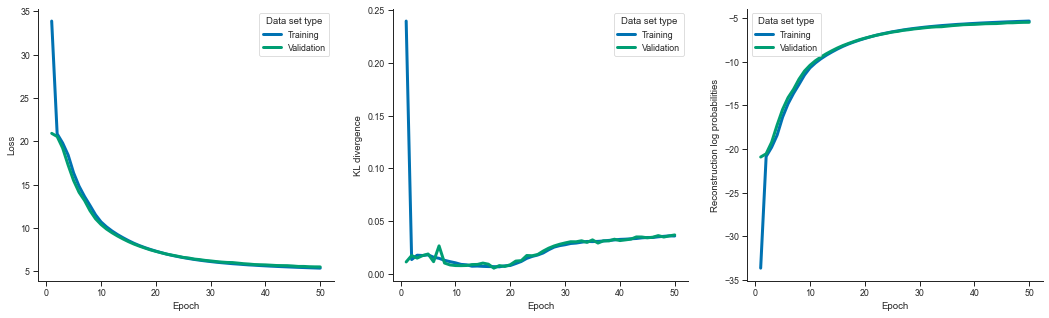

In [3]:
data_processed = "RegionBornholm_01062019_30092019_CargTank_14400_86400_600"
df_Default = curves_df("Default", data_processed)
plot_curves(df_Default)

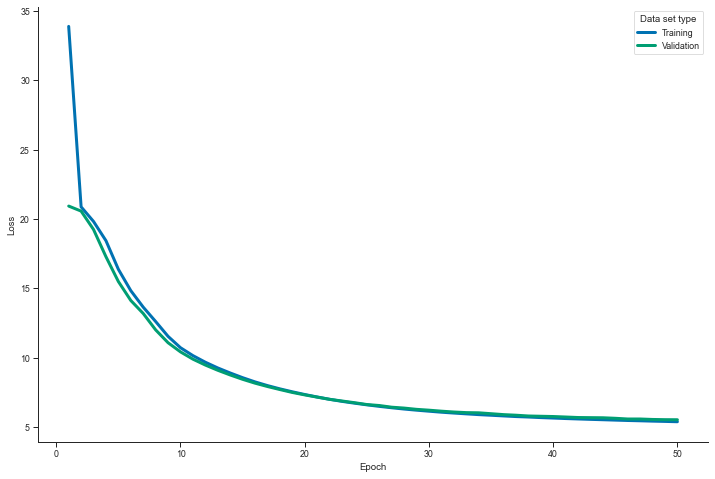

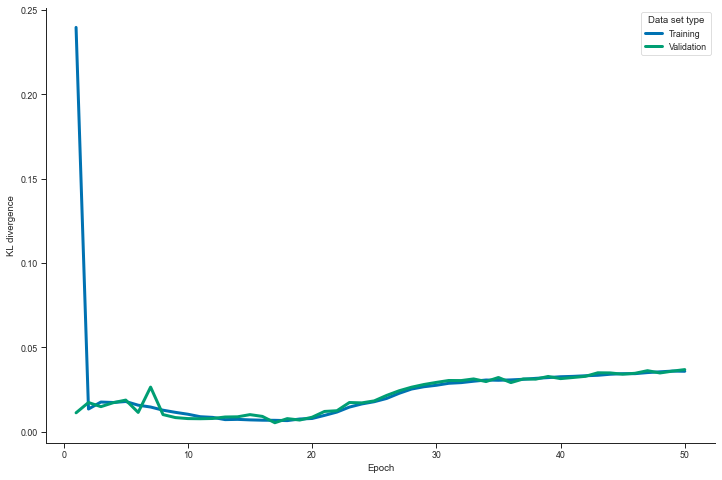

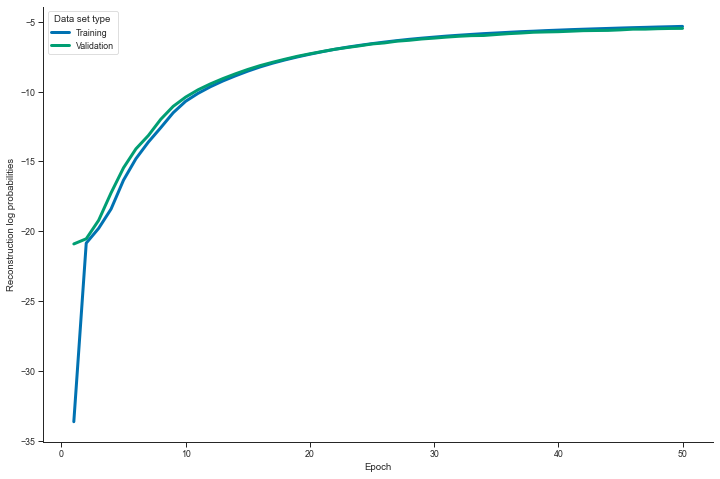

In [9]:
plot_curves_large(df_Default)

#  Add Scheduler

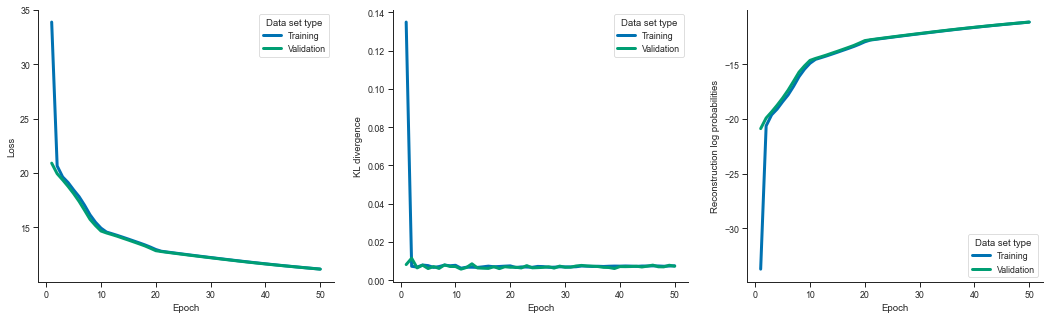

In [10]:
df_scheduler = curves_df("Scheduler", data_processed, scheduler=True)
plot_curves(df_scheduler)

#  Annealed Kullback–Leibler 

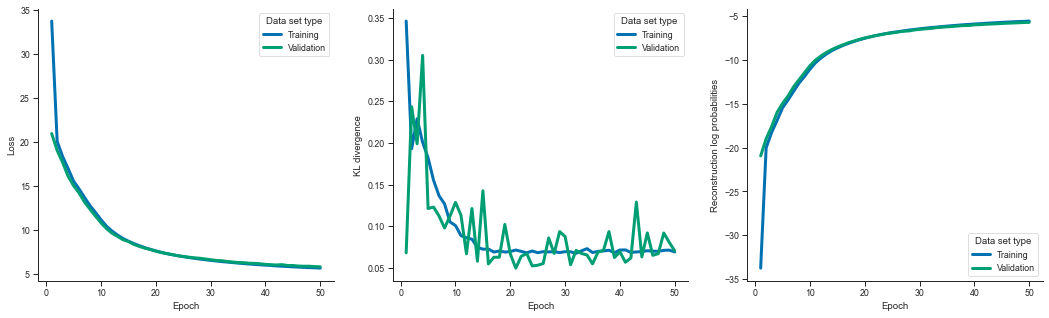

In [11]:
df_annealing = curves_df("Annealing", data_processed, kl_annealing=True)
plot_curves(df_annealing)

# Scheduler & Annealed Kullback–Leibler 

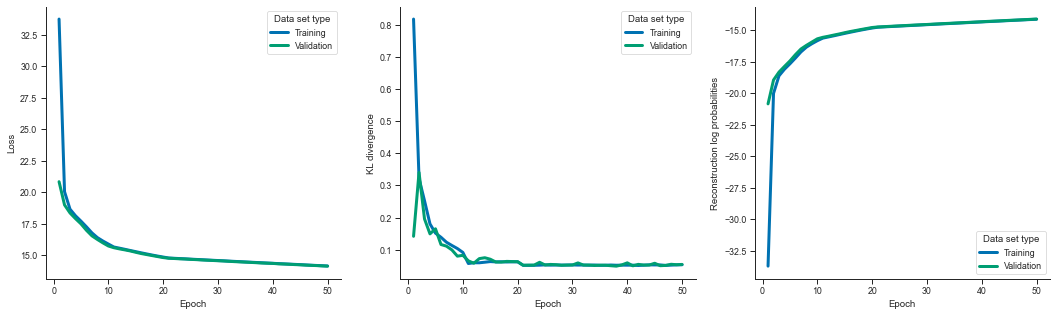

In [13]:
df_scheduler_annealing = curves_df("Scheduler_Annealing", data_processed, scheduler=True, kl_annealing=True)
plot_curves(df_scheduler_annealing)

In [7]:
batch_norm=False, scheduler=False, kl_annealing=False)

SyntaxError: cannot assign to False (Temp/ipykernel_9000/3554985725.py, line 1)